# Dividir el dataset en conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Jhon/Documents/Python Scripts/python-ml-course-master/datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 4.,  6., 16., 39., 46., 39., 34., 12.,  2.,  2.]),
 array([-2.41842781, -1.86396236, -1.30949692, -0.75503148, -0.20056604,
         0.3538994 ,  0.90836484,  1.46283028,  2.01729572,  2.57176116,
         3.1262266 ]),
 <BarContainer object of 10 artists>)

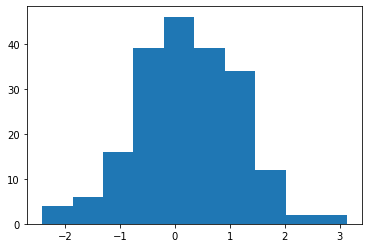

In [4]:
plt.hist(a)

In [5]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [6]:
len(training), len(testing)

(143, 57)

In [7]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Sales ~ TV + Radio", data = training).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     629.4
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.07e-70
Time:                        00:30:53   Log-Likelihood:                -275.41
No. Observations:                 143   AIC:                             556.8
Df Residuals:                     140   BIC:                             565.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6770      0.357      7.498      0.000       1.971       3.383
TV             0.0456      0.002     28.255      0.000       0.042       0.049
Radio          0.1966      0.010     20.436      0.000       0.178       0.216
==============================================================================
Omnibus:                       54.818   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.837
Skew:                          -1.450   Prob(JB):                     6.57e-39
Kurtosis:                       7.594   Cond. No.                         446.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.6 + 0.4TV + 0.19Radio

## Validación del modelo con  el conjunto de testing

In [8]:
sales_pred = lm.predict(testing)
sales_pred

4      13.047541
5      12.685784
6      11.747262
7      12.012860
12     10.662038
13      8.618576
25     15.357848
31     11.247411
32      7.405854
39     20.488255
45     15.087311
47     21.778047
48     16.147023
54     20.321778
58     22.042733
61     22.990144
65      7.652627
66      8.949380
67     11.881687
68     18.912116
69     21.196029
71     10.496650
77     13.775960
86     11.563090
89     17.081523
90      9.766590
93     21.297026
94     10.328198
95     16.337747
108     3.353179
110    14.589276
112    13.719081
114    15.443437
117     6.319410
119     6.706959
120    14.390652
123    15.093603
125     8.974279
126    10.679094
127     6.335507
148    12.331940
150    18.214104
151     9.847845
153    18.294853
155     5.144128
164    10.912846
165    14.042647
166    10.884302
173    11.754595
174    13.490671
179    12.196899
182     6.361091
184    18.441554
186     9.453425
193    18.541669
195     5.146844
198    23.869826
dtype: float64

In [11]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

166.7818622053211

In [12]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.7574279512407451

In [13]:
sales_mean = np.mean(testing["Sales"])
error = RSE / sales_mean
error

0.13036620669016458

<AxesSubplot:xlabel='TV', ylabel='Sales'>

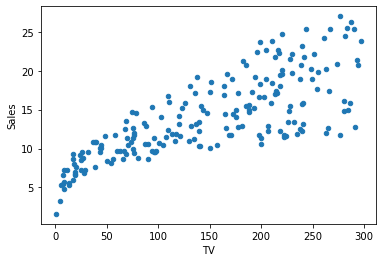

In [14]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
#plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)